In [73]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,10

['Overall data.csv']


In [74]:
df = pd.read_csv("../input/Overall data.csv")
df.head(20)

,Year,Age Group,Male death rates,Male death cases,Male population,Female death rates,Female death cases,Female population
0,2003,0 to 14,0.1,1,1175734,0.2,2,1126182
1,2003,15 to 24,2.1,18,846114,0.4,3,806988
2,2003,25 to 44,6.5,124,1895855,2.9,54,1877604
3,2003,45 to 64,5.7,83,1464383,3.6,54,1503808
4,2003,65+,0.7,5,668086,1.3,11,879004
5,2003,All ages,3.8,231,6050172,2.0,124,6193586
6,2004,0 to 14,0.0,0,1169930,0.0,0,1119565
7,2004,15 to 24,2.4,21,862015,0.7,6,822367
8,2004,25 to 44,6.1,115,1889899,2.4,45,1875391
9,2004,45 to 64,5.3,80,1516195,3.5,55,1554578


In [75]:
pivot_year_rate = pd.pivot_table(df,index=["Year"],values=["Female death rates","Male death rates"], aggfunc=np.mean)
pivot_year_rate

,Female death rates,Male death rates
Year,,
2003,1.733333,3.150000
2004,1.566667,2.900000
2005,2.216667,3.500000
2006,1.883333,3.666667
2007,2.066667,3.933333
2008,2.316667,3.916667
2009,2.266667,4.283333
2010,2.616667,4.483333
2011,2.500000,4.433333


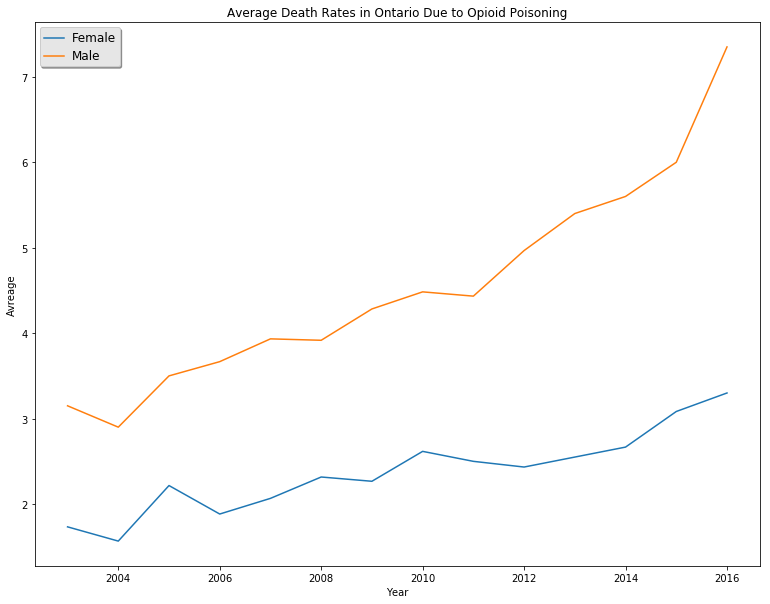

In [76]:
fig, ax = plt.subplots()
ax.plot(pivot_year_rate["Female death rates"], label='Female')
ax.plot(pivot_year_rate["Male death rates"], label='Male')
ax.set_title('Average Death Rates in Ontario Due to Opioid Poisoning')
ax.set_xlabel('Year')
ax.set_ylabel('Avreage')
legend = ax.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width


In [77]:
male_pivot_age_rate = pd.pivot_table(df,['Male death rates'], index='Year', columns ="Age Group", aggfunc=np.mean)
male_pivot_age_rate

Male death rates                                         
Age Group          0 to 14 15 to 24 25 to 44 45 to 64  65+ All ages
Year                                                               
2003                   0.1      2.1      6.5      5.7  0.7      3.8
2004                   0.0      2.4      6.1      5.3  0.1      3.5
2005                   0.0      1.9      7.3      6.5  1.0      4.3
2006                   0.0      2.1      6.8      7.6  1.1      4.4
2007                   0.0      2.7      7.9      6.9  1.4      4.7
2008                   0.1      3.1      7.7      7.0  0.9      4.7
2009                   0.1      2.4      8.9      7.9  1.2      5.2
2010                   0.0      3.2      9.9      7.2  1.2      5.4
2011                   0.0      3.1      9.2      7.8  1.2      5.3
2012                   0.1      4.5      9.5      9.5  0.3      5.9
2013                   0.0      3.9     11.3      9.1  1.7      6.4
2014                   0.0      4.4     12.3      9.0  1.3      6.6
2015                   0.0      5.7     12.8      9.0  1.5      7.0
2016                   0.1      5.1     15.2     12.4  2.6      8.7

Text(0,0.5,'Average Death Rate')

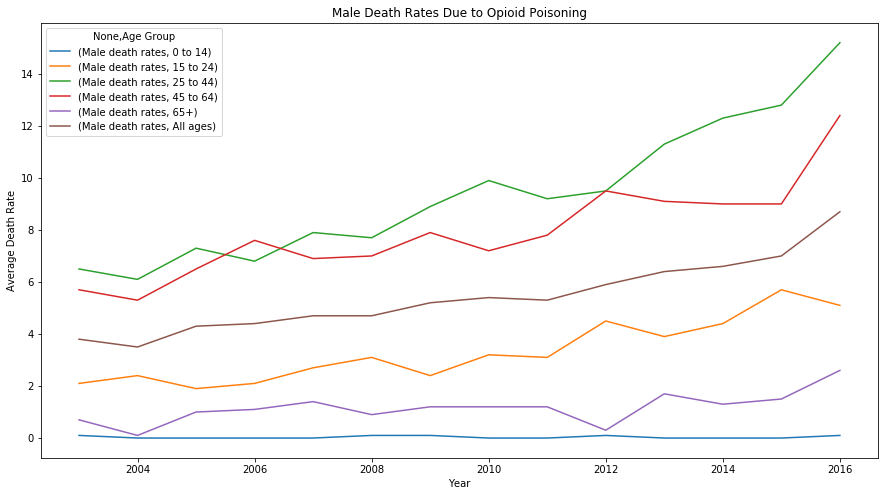

In [78]:
male_pivot_age_rate.plot(figsize=(15, 8),label = 'Age Group')
plt.title("Male Death Rates Due to Opioid Poisoning")
plt.ylabel("Average Death Rate")

In [79]:
female_pivot_age_rate = pd.pivot_table(df,['Female death rates'], index='Year', columns ="Age Group", aggfunc=np.mean)
female_pivot_age_rate

Female death rates                                         
Age Group            0 to 14 15 to 24 25 to 44 45 to 64  65+ All ages
Year                                                                 
2003                     0.2      0.4      2.9      3.6  1.3      2.0
2004                     0.0      0.7      2.4      3.5  1.0      1.8
2005                     0.0      1.1      3.6      4.2  1.9      2.5
2006                     0.0      1.1      2.7      4.6  0.7      2.2
2007                     0.0      0.3      3.6      4.8  1.2      2.5
2008                     0.0      1.1      3.3      6.0  0.7      2.8
2009                     0.0      0.9      3.9      5.4  0.6      2.8
2010                     0.1      1.1      4.2      5.9  1.3      3.1
2011                     0.0      0.7      3.8      6.5  0.9      3.1
2012                     0.0      1.9      3.4      5.3  1.2      2.8
2013                     0.0      1.2      4.4      5.5  1.1      3.1
2014                     0.1      1.7      4.9      5.6  0.5      3.2
2015                     0.1      2.1      3.9      7.2  1.6      3.6
2016                     0.1      2.5      5.3      6.4  1.7      3.8

Text(0,0.5,'Average Death Rate')

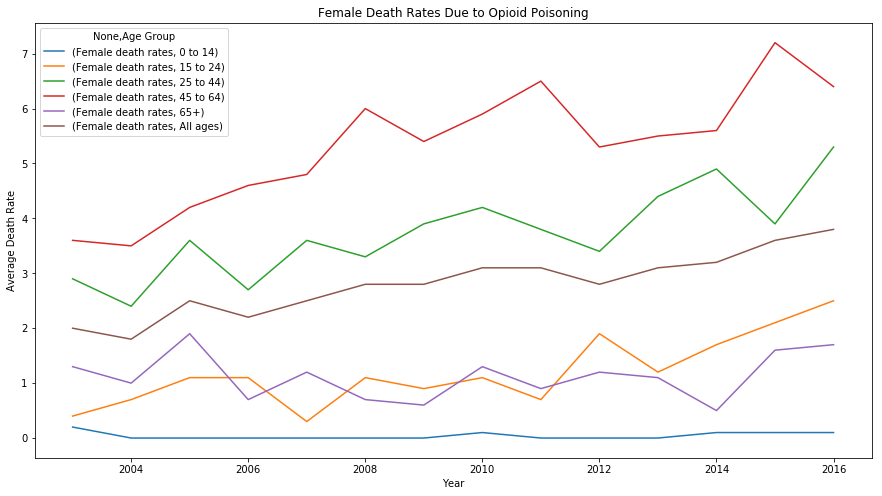

In [80]:
female_pivot_age_rate.plot(figsize=(15, 8),label = 'Age Group')
plt.title("Female Death Rates Due to Opioid Poisoning")
plt.ylabel("Average Death Rate")

In [81]:
from sklearn.linear_model import LinearRegression 
#female death rates 
year_predict = df.drop(["Age Group","Male death cases", "Male population", "Female death cases","Female population"], axis=1)
year_male_drop = year_predict.drop("Male death rates", axis = 1)

In [82]:
X = year_male_drop.drop("Female death rates", axis = 1)
y = year_male_drop["Female death rates"]
female_model = LinearRegression()
female_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
female_model.fit(train_X,train_y)
val_predictions = female_model.predict(val_X)
val_predictions
print(mean_absolute_error(val_y, val_predictions))

1.606310320910645


In [84]:
print("Estimated Intercept is", female_model.intercept_)

Estimated Intercept is -180.52403135214036


In [85]:
print("The coefficients in this model are", female_model.coef_)

The coefficients in this model are [0.09100371]


In [86]:
female_model.predict(X)[:200]

array([1.75640529, 1.75640529, 1.75640529, 1.75640529, 1.75640529,
       1.75640529, 1.84740901, 1.84740901, 1.84740901, 1.84740901,
       1.84740901, 1.84740901, 1.93841272, 1.93841272, 1.93841272,
       1.93841272, 1.93841272, 1.93841272, 2.02941643, 2.02941643,
       2.02941643, 2.02941643, 2.02941643, 2.02941643, 2.12042014,
       2.12042014, 2.12042014, 2.12042014, 2.12042014, 2.12042014,
       2.21142386, 2.21142386, 2.21142386, 2.21142386, 2.21142386,
       2.21142386, 2.30242757, 2.30242757, 2.30242757, 2.30242757,
       2.30242757, 2.30242757, 2.39343128, 2.39343128, 2.39343128,
       2.39343128, 2.39343128, 2.39343128, 2.484435  , 2.484435  ,
       2.484435  , 2.484435  , 2.484435  , 2.484435  , 2.57543871,
       2.57543871, 2.57543871, 2.57543871, 2.57543871, 2.57543871,
       2.66644242, 2.66644242, 2.66644242, 2.66644242, 2.66644242,
       2.66644242, 2.75744613, 2.75744613, 2.75744613, 2.75744613,
       2.75744613, 2.75744613, 2.84844985, 2.84844985, 2.84844

In [87]:
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [88]:
#male death rates
year_female_drop = year_predict.drop("Female death rates", axis = 1)
X2 = year_female_drop.drop("Male death rates", axis = 1)
y2 = year_female_drop["Male death rates"]
male_model= LinearRegression()
male_model.fit(X2,y2)
print("Estimated Intercept is", male_model.intercept_)

Estimated Intercept is -554.8059706959706


In [89]:
print("The coefficients in this model are", male_model.coef_)

The coefficients in this model are [0.27835165]


In [90]:
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y2,random_state = 0)
male_model.fit(train_X2,train_y2)
val_predictions2 = male_model.predict(val_X2)
val_predictions2
print(mean_absolute_error(val_y2, val_predictions2))

3.347548026286953


In [91]:
print("Estimated Intercept is", male_model.intercept_)

Estimated Intercept is -492.5327515628469


In [92]:
print("The coefficients in this model are", male_model.coef_)

The coefficients in this model are [0.24729953]


In [93]:
male_model.predict(X2)[:200]

array([2.80820138, 2.80820138, 2.80820138, 2.80820138, 2.80820138,
       2.80820138, 3.0555009 , 3.0555009 , 3.0555009 , 3.0555009 ,
       3.0555009 , 3.0555009 , 3.30280043, 3.30280043, 3.30280043,
       3.30280043, 3.30280043, 3.30280043, 3.55009996, 3.55009996,
       3.55009996, 3.55009996, 3.55009996, 3.55009996, 3.79739949,
       3.79739949, 3.79739949, 3.79739949, 3.79739949, 3.79739949,
       4.04469901, 4.04469901, 4.04469901, 4.04469901, 4.04469901,
       4.04469901, 4.29199854, 4.29199854, 4.29199854, 4.29199854,
       4.29199854, 4.29199854, 4.53929807, 4.53929807, 4.53929807,
       4.53929807, 4.53929807, 4.53929807, 4.78659759, 4.78659759,
       4.78659759, 4.78659759, 4.78659759, 4.78659759, 5.03389712,
       5.03389712, 5.03389712, 5.03389712, 5.03389712, 5.03389712,
       5.28119665, 5.28119665, 5.28119665, 5.28119665, 5.28119665,
       5.28119665, 5.52849618, 5.52849618, 5.52849618, 5.52849618,
       5.52849618, 5.52849618, 5.7757957 , 5.7757957 , 5.77579

In [94]:
trace = go.Scatter(
    x =df.Year,
    y = female_model.predict(X),
    mode = 'markers',
    name ="Predicted Female Death Rate"
)
trace1 = go.Scatter(
    x = df.Year,
    y = male_modelprint,
    mode = "markers",
    name = "Predicted Male Death Rate"
)
data = [trace,trace1]
layout = go.Layout(
    title='Predicted Male and Female Death Rates',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Predicted Death Rate',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

NameError: name 'male_modelprint' is not defined

In [96]:
data1 = df.set_index("Age Group")
data1.head()

,Year,Male death rates,Male death cases,Male population,Female death rates,Female death cases,Female population
Age Group,,,,,,,
0 to 14,2003,0.1,1,1175734,0.2,2,1126182
15 to 24,2003,2.1,18,846114,0.4,3,806988
25 to 44,2003,6.5,124,1895855,2.9,54,1877604
45 to 64,2003,5.7,83,1464383,3.6,54,1503808
65+,2003,0.7,5,668086,1.3,11,879004


In [97]:
data2 = data1.loc["All ages"]
data2

,Year,Male death rates,Male death cases,Male population,Female death rates,Female death cases,Female population
Age Group,,,,,,,
All ages,2003,3.8,231,6050172,2.0,124,6193586
All ages,2004,3.5,217,6120522,1.8,115,6269546
All ages,2005,4.3,264,6188067,2.5,161,6339923
All ages,2006,4.4,278,6251772,2.2,144,6409794
All ages,2007,4.7,295,6292177,2.5,164,6472018
All ages,2008,4.7,297,6341504,2.8,184,6541121
All ages,2009,5.2,331,6389905,2.8,184,6607782
All ages,2010,5.4,347,6452783,3.1,210,6682280
All ages,2011,5.3,347,6513580,3.1,209,6749964


In [98]:
trace3 = go.Scatter(
    x =data2["Year"],
    y = data2["Female death rates"],
    mode = 'markers',
    name ="Actual Female Death Rate"
)
trace4 = go.Scatter(
    x = data2["Year"],
    y = data2["Male death rates"],
    mode = "markers",
    name = "Actual Male Death Rate"
)
data2 = [trace3,trace4]
layout2 = go.Layout(
    title='Actual Male and Female Death Rates',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Actual Death Rate',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig2 = go.Figure(data=data2, layout=layout2)
iplot(fig2)

In [99]:
mse_female = np.mean((df["Female death rates"] - female_model.predict(X))**2)
print(mse_female)

3.4297645376754198


In [100]:
mse_male = np.mean((df["Male death rates"] - male_model.predict(X2))**2)
print(mse_male)

12.459459646790062


In [101]:
df.columns

Index(['Year', 'Age Group', 'Male death rates', 'Male death cases',
       'Male population', 'Female death rates', 'Female death cases',
       'Female population'],
      dtype='object')

In [102]:
from sklearn.metrics import r2_score
female_y_true = df["Female death rates"]
female_y_pred = lmfem.predict(X)

In [103]:
r2_score(female_y_true, female_y_pred)

0.05114687726271516

In [104]:
male_y_true = df["Male death rates"]
male_y_pred = male_model.predict(X2)
r2_score(male_y_true,male_y_pred)

0.08968355454016219

In [105]:
#next step --> encode the ages into numerical categories and due a regression/predictive analysis on that 


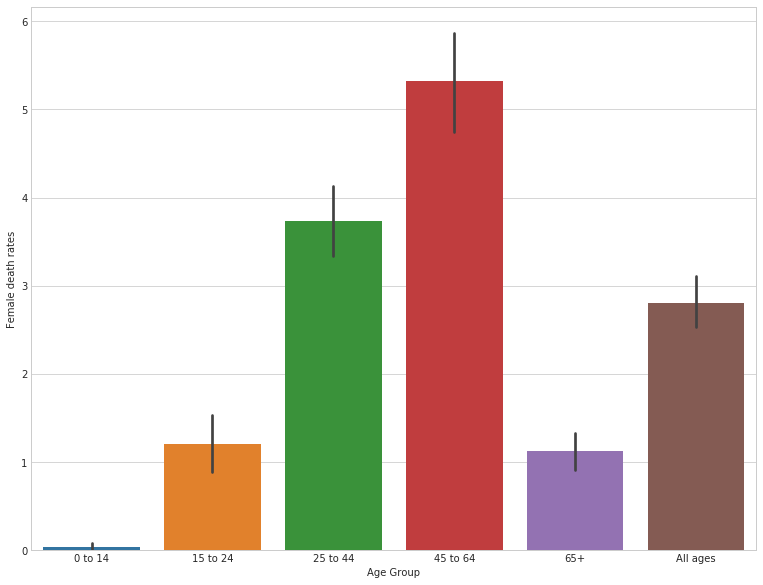

In [109]:
import seaborn as sns
sns.set_style("whitegrid")
ax2 = sns.barplot(x="Age Group", y="Female death rates", data=df)

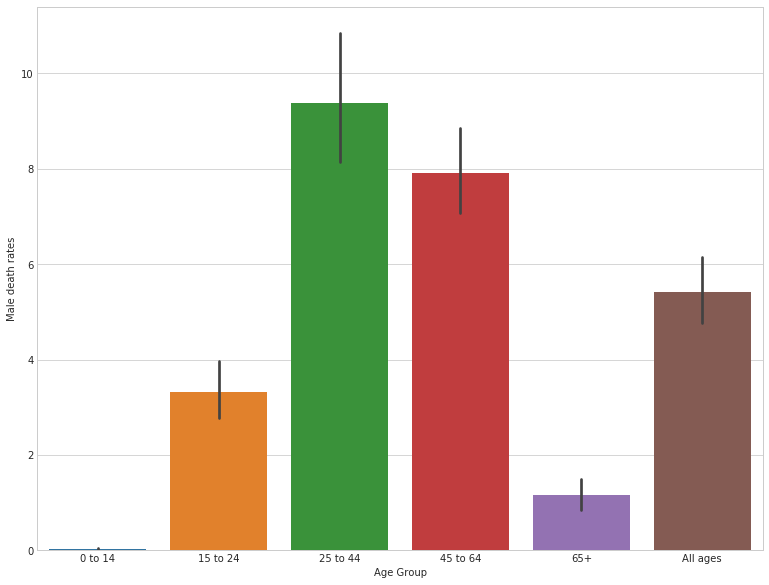

In [110]:
import seaborn as sns
sns.set_style("whitegrid")
ax2 = sns.barplot(x="Age Group", y="Male death rates", data=df)